In [1]:
import json
import pandas as pd
from datetime import datetime

In [5]:
with open('posts.json', 'r') as file:
    data = json.load(file)

In [6]:
len(data)

474

In [7]:
data[1]

{'BAInfo': '',
 'adAuthorization': False,
 'adLabelVersion': 0,
 'aigcLabelType': 0,
 'author': {'avatarLarger': 'https://p16-sign-va.tiktokcdn.com/tos-maliva-avt-0068/7310710960996483118~c5_1080x1080.jpeg?lk3s=a5d48078&x-expires=1713178800&x-signature=omCo2%2BVJVIRzPFySiaQ96FX5nMc%3D',
  'avatarMedium': 'https://p77-sign-va.tiktokcdn.com/tos-maliva-avt-0068/7310710960996483118~c5_720x720.jpeg?lk3s=a5d48078&x-expires=1713178800&x-signature=mz4du%2BPqkniQn%2FRWQhL7yyeCKlA%3D',
  'avatarThumb': 'https://p77-sign-va.tiktokcdn.com/tos-maliva-avt-0068/7310710960996483118~c5_100x100.jpeg?lk3s=a5d48078&x-expires=1713178800&x-signature=yLbkMhWH1FGuTsoWj7aHiUTDnT4%3D',
  'commentSetting': 0,
  'downloadSetting': 0,
  'duetSetting': 0,
  'ftc': False,
  'id': '6734083000290722821',
  'isADVirtual': False,
  'isEmbedBanned': False,
  'nickname': 'marissa ren',
  'openFavorite': False,
  'privateAccount': False,
  'relation': 0,
  'secUid': 'MS4wLjABAAAAS7wgMAQ1Q91-SqvywvB65aOP9j56-8BMme7pN_qn3a2R

In [8]:
post_list = []

In [9]:
for record in data:
    id = record['id']
    user_name = record['author']['nickname']
    author = record['authorStats']
    author_follower = author['followerCount']
    author_heart = author['heart']
    desc = record['desc']
    challenge = record['challenges']
    cha_desc = challenge[0]['desc']
    stats = record['statsV2']
    comments = stats['commentCount']
    digg = stats['diggCount']
    view = stats['playCount']
    share = stats['shareCount']
    posttime = record['createTime']

    post_list.append(
        {'id':id,
         'user_name':user_name,
        'author_follower':author_follower,
        'author_heart':author_heart,
        'posttime':posttime,
        'view':view,
        'share':share,
        'digg':digg,
        'comments':comments,
        'desc':desc,
        'cha_desc':cha_desc}
    )

df = pd.DataFrame(post_list)


In [10]:
df.head(20)

,id,user_name,author_follower,author_heart,posttime,view,share,digg,comments,desc,cha_desc
0,7324359490361412869,Carol Brailey|Color Analysis🎨,323700,6800000,1705335339,17444557,11690,2207386,8115,This client’s colour analysis update raises so...,
1,7309534985084521759,marissa ren,2400000,87600000,1701883746,15775359,9207,1905913,3221,very fun but humbling experience lol #personal...,
2,7190844699408698667,Rosa,25900,2100000,1674249012,9174808,54000,1483705,3330,me the entire video🤨 #fyp #korea #personalcolo...,
3,7130674894198623534,khadija 🍉,4076,1900000,1660239629,12565693,1075,1469326,1008,When I realized I bought two blue tops the day...,
4,7164035101205040430,shu ☁️,9355,1700000,1668006917,13440706,3235,1202012,1387,I'm still in denial 🥲 #personalcoloranalysis #...,
5,7228231085077908754,Molita Lin,64800,2900000,1682953700,9304393,12573,1014673,1721,Finally i tried the personal color test & body...,
6,7064232817164602630,Julia Dobkine|Agile Styling,202800,5100000,1644769874,7584594,824,881272,945,#personalcolor #personalcoloranalysis #colourc...,
7,7351867077415865646,Fashion Finds and Fits,22500,2000000,1711739975,18499755,32432,742171,36275,Use the app WhatColors to find all of this out...,Try our new #ColorAnalysis effect and share yo...
8,7329912922581257504,★,11900,1900000,1706628352,6197404,3816,712768,14447,#fyp #foryou #colorpalette #fypシ #undertone #w...,
9,7130656073572306222,nvemaa,5784,1700000,1660235247,6887743,314,683663,975,ignore my rbf #personalcolor #personalcolorana...,


In [11]:
print(df.dtypes)

id                 object
user_name          object
author_follower     int64
author_heart        int64
posttime            int64
view               object
share              object
digg               object
comments           object
desc               object
cha_desc           object
dtype: object


In [12]:
df['post_date']=df['posttime'].apply(lambda x: datetime.fromtimestamp(x))
df.pop('posttime')

0      1705335339
1      1701883746
2      1674249012
3      1660239629
4      1668006917
          ...    
469    1667536565
470    1710332080
471    1712548430
472    1675692635
473    1706026523
Name: posttime, Length: 474, dtype: int64

In [26]:
int_list = ['id','view','share','comments','digg']
str_list = ['user_name','desc','cha_desc'] 

for attr in int_list:
    df[attr] = df[attr].astype(int)

for re in str_list:
    df[re] = df[re].astype('string')

df

,id,user_name,author_follower,author_heart,view,share,digg,comments,desc,cha_desc,post_date
0,7324359490361412869,Carol Brailey|Color Analysis🎨,323700,6800000,17444557,11690,2207386,8115,This client’s colour analysis update raises so...,,2024-01-15 17:15:39
1,7309534985084521759,marissa ren,2400000,87600000,15775359,9207,1905913,3221,very fun but humbling experience lol #personal...,,2023-12-06 18:29:06
2,7190844699408698667,Rosa,25900,2100000,9174808,54000,1483705,3330,me the entire video🤨 #fyp #korea #personalcolo...,,2023-01-20 22:10:12
3,7130674894198623534,khadija 🍉,4076,1900000,12565693,1075,1469326,1008,When I realized I bought two blue tops the day...,,2022-08-11 19:40:29
4,7164035101205040430,shu ☁️,9355,1700000,13440706,3235,1202012,1387,I'm still in denial 🥲 #personalcoloranalysis #...,,2022-11-09 16:15:17
...,...,...,...,...,...,...,...,...,...,...,...
469,7162014867740806402,Liana | Color Analysis+Styling,56800,6500000,147250,149,3489,51,"Knowing your best colors, prints, accessories,...",,2022-11-04 05:36:05
470,7345820336610397446,Bella ♡,180300,9100000,47933,6,3037,44,personal color analysis helps too! #personalco...,,2024-03-13 13:14:40
471,7355339480686955782,Wibwub.home.studio,223,4175,77928,873,3012,10,เติมความรักให้ตัวเองผ่านศาสตร์ personal color ...,,2024-04-08 05:53:50
472,7197045049178213637,Carol Brailey|Color Analysis🎨,323700,6800000,90393,50,3269,91,Colour Analysis Storytime: Featuring a Bright ...,,2023-02-06 15:10:35


In [27]:
print(df.dtypes)

id                          int64
user_name                  string
author_follower             int64
author_heart                int64
view                        int64
share                       int64
digg                        int64
comments                    int64
desc                       string
cha_desc                   string
post_date          datetime64[ns]
dtype: object


In [28]:
sorted_df = df.sort_values(by='view', ascending=False)
sorted_df

,id,user_name,author_follower,author_heart,view,share,digg,comments,desc,cha_desc,post_date
7,7351867077415865646,Fashion Finds and Fits,22500,2000000,18499755,32432,742171,36275,Use the app WhatColors to find all of this out...,Try our new #ColorAnalysis effect and share yo...,2024-03-29 20:19:35
0,7324359490361412869,Carol Brailey|Color Analysis🎨,323700,6800000,17444557,11690,2207386,8115,This client’s colour analysis update raises so...,,2024-01-15 17:15:39
1,7309534985084521759,marissa ren,2400000,87600000,15775359,9207,1905913,3221,very fun but humbling experience lol #personal...,,2023-12-06 18:29:06
14,7290200166274026758,moon | saekjo studios,19400,1400000,14531479,822,392602,752,"dalam lubuk hati, client ini tau yang bagus ad...",,2023-10-15 17:00:00
4,7164035101205040430,shu ☁️,9355,1700000,13440706,3235,1202012,1387,I'm still in denial 🥲 #personalcoloranalysis #...,,2022-11-09 16:15:17
...,...,...,...,...,...,...,...,...,...,...,...
435,7224381173982612762,Peony Style,88800,2400000,32348,52,3631,9,WHAT COLOR YOU WEAR MEANS ? 🌸🌈 #personalstylei...,,2023-04-21 08:08:50
458,7241808673683672325,Peony Style,88800,2400000,32002,91,3150,17,YOUR OUTFIT CAN EFFECT YOUR MOOD 🤓😆😂 #personal...,,2023-06-07 07:16:20
464,7229915554813857051,Peony Style,88800,2400000,29899,55,3087,20,GET READY IN UNDER 5 MINUTES! 🌸🌷💗#personalstyl...,,2023-05-06 06:05:01
457,7192980570660457733,Monica | armocromia e ugc 🦄🦋,7912,816500,27337,9,3159,15,Voi l’avevate notato? 😌#armocromia#blairwaldor...,,2023-01-26 16:18:20


In [29]:
sorted_date_df = df.sort_values(by='post_date')
sorted_date_df

,id,user_name,author_follower,author_heart,view,share,digg,comments,desc,cha_desc,post_date
53,6885327644208942342,theoutfitcurator,65800,1900000,1017748,1101,107863,499,@reneferret Personal Color Analysis #coloranal...,Try our new #ColorAnalysis effect and share yo...,2020-10-19 15:49:25
217,6903639521028574469,theoutfitcurator,65800,1900000,210697,57,15592,97,So happy to be coloring lives around the world...,Try our new #ColorAnalysis effect and share yo...,2020-12-07 23:07:47
131,6949303743963761926,samantha rae,568,56800,294783,684,42215,137,Cannot recommend PCA enough. @colorpolitan is ...,,2021-04-10 01:27:47
82,6974909805689425158,theoutfitcurator,65800,1900000,1167933,299,75014,463,#AprendeConTikTok #personalcoloranalysis #colo...,¡Pásatelo bien aprendiendo cosas nuevas! ¿Cien...,2021-06-18 01:32:23
463,6991488189366078725,theoutfitcurator,65800,1900000,317368,139,5241,75,DM for more info about appointments in Boston ...,,2021-08-01 17:44:56
...,...,...,...,...,...,...,...,...,...,...,...
186,7354039741592948000,✨️Konsty✨️,6652,265000,249558,913,21355,198,Έκανα το προσωπικό μου color analysis στην Κορ...,,2024-04-04 17:50:14
471,7355339480686955782,Wibwub.home.studio,223,4175,77928,873,3012,10,เติมความรักให้ตัวเองผ่านศาสตร์ personal color ...,,2024-04-08 05:53:50
386,7355395514206080262,Jessica Harviali,1800000,57500000,38362,6,5051,34,Hasilnya yang sangat tidak diduga 🫣 nanti aku...,,2024-04-08 09:31:17
124,7355474649096015110,meisya on the internet,2090,316400,427384,1244,44654,252,GIRL GETS PERSONAL COLOR ANALYSIS THINKING HER...,,2024-04-08 14:38:21


In [34]:
sorted_date_df[sorted_date_df['cha_desc'].str.contains('new')]

,id,user_name,author_follower,author_heart,view,share,digg,comments,desc,cha_desc,post_date
53,6885327644208942342,theoutfitcurator,65800,1900000,1017748,1101,107863,499,@reneferret Personal Color Analysis #coloranal...,Try our new #ColorAnalysis effect and share yo...,2020-10-19 15:49:25
217,6903639521028574469,theoutfitcurator,65800,1900000,210697,57,15592,97,So happy to be coloring lives around the world...,Try our new #ColorAnalysis effect and share yo...,2020-12-07 23:07:47
317,7069881581132844293,Curate Your Style,138000,4100000,161530,33,7319,35,Reply to @kizoomtite #coloranalysis #colourana...,Try our new #ColorAnalysis effect and share yo...,2022-02-28 22:51:20
202,7077775033761926426,Sangrawee Mitprasert,17600,596600,808470,81,18647,117,PC สี Sfe Zone ที่ผู้ชายส่วนใหญ่ชอบใส่ คิดว่าร...,Try our new #ColorAnalysis effect and share yo...,2022-03-22 05:21:57
21,7085431169617071402,gracemchoi,299400,3900000,4301052,8726,284362,2833,#coloranalysis #coloranalysistok #colorseasons...,Try our new #ColorAnalysis effect and share yo...,2022-04-11 21:31:41
395,7085495916467195179,dianne 💫,756,85700,93049,102,4699,98,Help someone tell me #coloranalysis #coloranal...,Try our new #ColorAnalysis effect and share yo...,2022-04-12 01:42:57
370,7087466995855215918,Ash,4120,269100,206972,113,5383,183,New version of the filter!!! Much easier to se...,Try our new #ColorAnalysis effect and share yo...,2022-04-17 09:11:44
127,7101393646075022638,saks,175900,9200000,301521,217,42912,101,never doing the undertone vein test again lmao...,Try our new #ColorAnalysis effect and share yo...,2022-05-24 21:54:14
340,7105794210011286789,Karolína,68100,2600000,84351,1,6286,59,No a teď babo raď 😅🧐🤔🤭🫣 #coloranalysis #person...,Try our new #ColorAnalysis effect and share yo...,2022-06-05 18:30:41
341,7118846510015466757,Curate Your Style,138000,4100000,616814,33,6239,8640,Let us know your thoughts! #coloranalysis #per...,Try our new #ColorAnalysis effect and share yo...,2022-07-10 22:40:18


In [54]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [71]:
sns.set_style('whitegrid')
palette = sns.color_palette('coolwarm')

In [82]:
plot_df_count = df.groupby(df['post_date'].dt.year).agg(
    post_count=('post_date', 'size'),
    view_count=('view', 'sum'),
    comments_count=('comments', 'sum'),
    share_count=('share', 'sum'),
    digg_count=('digg', 'sum')
).reset_index()

plot_df_count.rename(columns={'post_date': 'year'}, inplace=True)

In [89]:
plot_df_count

,year,post_count,view_count,comments_count,share_count,digg_count
0,2020,2,1228445,596,1158,123455
1,2021,4,2279523,892,2185,152666
2,2022,94,106680878,49875,40700,9225472
3,2023,289,233222758,60047,290392,17410302
4,2024,85,97042277,95358,94920,6545666


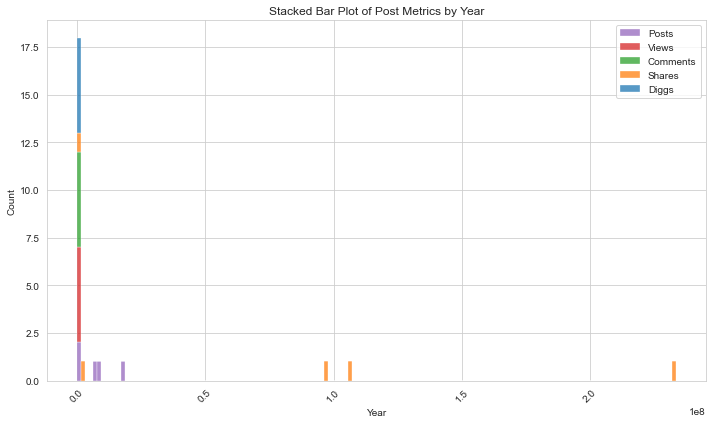

In [97]:
# 绘制堆积的条形图
plt.figure(figsize=(10, 6))
sns.histplot(data=plot_df_count[['post_count','view_count','comments_count','share_count','digg_count']], multiple="stack")

# 添加图例
plt.legend(labels=['Posts', 'Views', 'Comments', 'Shares', 'Diggs'])

# 添加标题和标签
plt.title('Stacked Bar Plot of Post Metrics by Year')
plt.xlabel('Year')
plt.ylabel('Count')

# 显示图形
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()